In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedShuffleSplit
!pip install --upgrade --user scikit-learn
from collections import Counter
sc = StandardScaler()
sns.set()
import matplotlib.pyplot as plt
import timeit
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold
%matplotlib inline
Mushroom_data = pd.read_csv('agaricus-lepiota.data', header=None)
Mushroom_data.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [2]:
datacolumns=['edibleorpoisoned','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

In [3]:
Mushroom_data.columns=datacolumns

In [4]:
shuffle = StratifiedShuffleSplit(n_splits=1,test_size=0.2, random_state=23784559)
shuffle2 = StratifiedShuffleSplit(n_splits=1,test_size=0.25, random_state=23784559)
shuffle3 = StratifiedShuffleSplit(n_splits=1,test_size=0.16666, random_state=23784559)
print(Mushroom_data.isna().sum())

edibleorpoisoned            0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [5]:
Mushroom_data['edibleorpoisoned'] = Mushroom_data['edibleorpoisoned'].replace('e',1)
Mushroom_data['edibleorpoisoned'] = Mushroom_data['edibleorpoisoned'].replace('p',0)
Mushroom_data = Mushroom_data.replace({'cap-shape': {'b':1,'c':2,'x':3,'f':4,'k':5,'s':6}})
Mushroom_data = Mushroom_data.replace({'cap-surface': {'f':1,'g':2,'y':3,'s':4}})
Mushroom_data = Mushroom_data.replace({'cap-color': {'n':1,'b':2,'c':3,'g':4,'r':5,'p':6,'u':7,'e':8,'w':9,'y':10}})
Mushroom_data = Mushroom_data.replace({'bruises?': {'t':1,'f':2}})
Mushroom_data = Mushroom_data.replace({'odor': {'a':1,'l':2,'c':3,'y':4,'f':5,'m':6,'n':7,'p':8,'s':9}})
Mushroom_data = Mushroom_data.replace({'gill-attachment': {'a':1,'d':2,'f':3,'n':4}})
Mushroom_data = Mushroom_data.replace({'gill-spacing': {'c':1,'w':2,'d':3}})
Mushroom_data = Mushroom_data.replace({'gill-size': {'b':1,'n':2}})
Mushroom_data = Mushroom_data.replace({'gill-color': {'k':1,'n':2,'b':3,'h':4,'g':5,'r':6,'o':7,'p':8,'u':9,'e':10,'w':11,'y':12}})
Mushroom_data = Mushroom_data.replace({'stalk-shape': {'e':1,'t':2}})
Mushroom_data = Mushroom_data.replace({'stalk-root': {'b':1,'c':2,'u':3,'e':4,'z':5,'r':6,'?':7}})
Mushroom_data = Mushroom_data.replace({'stalk-surface-above-ring': {'f':1,'y':2,'k':3,'s':4}})
Mushroom_data = Mushroom_data.replace({'stalk-surface-below-ring': {'f':1,'y':2,'k':3,'s':4}})
Mushroom_data = Mushroom_data.replace({'stalk-color-above-ring': {'n':1,'b':2,'c':3,'g':4,'o':5,'p':6,'e':7,'w':8,'y':9}})
Mushroom_data = Mushroom_data.replace({'stalk-color-below-ring': {'n':1,'b':2,'c':3,'g':4,'o':5,'p':6,'e':7,'w':8,'y':9}})
Mushroom_data = Mushroom_data.replace({'veil-type': {'p':1,'u':2}})
Mushroom_data = Mushroom_data.replace({'veil-color': {'n':1,'o':2,'w':3,'y':4}})
Mushroom_data = Mushroom_data.replace({'ring-number': {'n':1,'o':2,'t':3}})
Mushroom_data = Mushroom_data.replace({'ring-type': {'c':1,'e':2,'f':3,'l':4,'n':5,'p':6,'s':7,'z':8}})
Mushroom_data = Mushroom_data.replace({'spore-print-color': {'k':1,'n':2,'b':3,'h':4,'g':5,'r':6,'o':7,'p':8,'u':9,'e':10,'w':11,'y':12}})
Mushroom_data = Mushroom_data.replace({'population': {'a':1,'c':2,'n':3,'s':4,'v':5,'y':6}})
Mushroom_data = Mushroom_data.replace({'habitat': {'g':1,'l':2,'m':3,'p':4,'u':5,'w':6,'d':7}})


<AxesSubplot:>

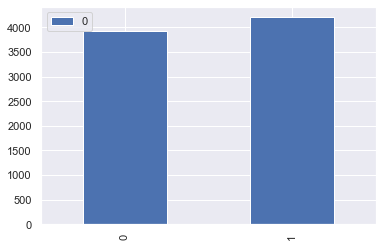

In [6]:
counts1 = Counter(Mushroom_data['edibleorpoisoned'])
plottedcolumn1 = pd.DataFrame.from_dict(counts1, orient='index')
plottedcolumn1.plot(kind="bar")

In [7]:
calledcol=['edibleorpoisoned','cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
#Mushroom_data = pd.get_dummies(Mushroom_data, columns=calledcol, drop_first=False)
#calledcol2=['cap-shape','cap-surface','cap-color','bruises?','odor','gill-attachment','gill-spacing','gill-size','gill-color','stalk-shape','stalk-root','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
calledcol2=['cap-shape','cap-surface','cap-color','odor','gill-attachment','gill-spacing','gill-size','stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring','spore-print-color','population','habitat']

X = Mushroom_data[calledcol2]
y = Mushroom_data['edibleorpoisoned']
train, test = next(shuffle.split(X=X, y=y))
X_test = X.loc[test]
y_test = y.loc[test]
X_train = X.loc[train]
y_train = y.loc[train]
X_train0=X_train
y_train0=y_train
train, val = next(shuffle2.split(X=X_train, y=y_train))
X_train = X.loc[train]
y_train = y.loc[train]
X_val = X.loc[val]
y_val = y.loc[val]
from sklearn import preprocessing
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)
X_val1 = preprocessing.scale(X_val)
sc.fit(X_train1)
#sc.fit(y_train)
sc.transform(X_test1)
#sc.transform(y_test)
sc.transform(X_val1)
#sc.tranform(y_val)

array([[-0.56585898,  0.36913771, -1.03515101, ...,  2.16486389,
        -2.03326031,  0.61523337],
       [-0.56585898,  1.21758011,  1.02988629, ..., -0.49954193,
        -0.50960432,  0.22193902],
       [-0.56585898,  1.21758011,  0.14487031, ..., -0.79558702,
         0.25222367,  1.00852771],
       ...,
       [ 0.76677992,  0.36913771, -0.44514035, ...,  0.09254825,
         1.01405166,  1.00852771],
       [ 0.76677992,  0.36913771, -1.33015633, ...,  2.16486389,
         0.25222367,  1.00852771],
       [ 2.09941881,  1.21758011,  0.14487031, ...,  2.16486389,
        -2.03326031,  0.61523337]])

In [8]:
print(Mushroom_data.columns.tolist())

['edibleorpoisoned', 'cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


In [9]:
#peformance metric functions
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['auc','f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    
    if include_cm:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'auc': roc_auc_score(y_true,y_pred),
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

#This wrapper can be used to return multiple performance metrics during cross-validation
def p1_metrics_scorer(clf,X,y_true):
    y_pred=clf.predict(X)
    return p1_metrics(y_true,y_pred,include_cm=False)
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

In [10]:
gnbmodel = GaussianNB()
y_pred1 = gnbmodel.fit(X_train, y_train).predict(X_test)
print(p1_metrics(y_test,y_pred1,include_cm=True))

{'auc': 0.6990448758202055, 'f1': 0.5884270578647107, 'accuracy': 0.6892307692307692, 'sensitivity': 0.42874109263657956, 'specificity': 0.9693486590038314, 'precision': 0.9376623376623376, 'confusion_matrix': array([[759,  24],
       [481, 361]], dtype=int64)}


In [11]:
svmmodel = svm.SVC(kernel='linear',random_state=23784559) 
svmmodel.fit(X_train1, y_train)
y_pred2 = svmmodel.predict(X_test1)
print(p1_metrics(y_test,y_pred2,include_cm=True))

{'auc': 0.9383029519813859, 'f1': 0.9422740524781342, 'accuracy': 0.939076923076923, 'sensitivity': 0.9596199524940617, 'specificity': 0.9169859514687101, 'precision': 0.9255441008018328, 'confusion_matrix': array([[718,  65],
       [ 34, 808]], dtype=int64)}


In [12]:
rfcmodel = RandomForestClassifier(random_state=23784559)
rfcmodel.fit(X_train, y_train)
y_pred3 = rfcmodel.predict(X_test)
print(p1_metrics(y_test,y_pred3,include_cm=True))

{'auc': 0.997624703087886, 'f1': 0.9976190476190476, 'accuracy': 0.9975384615384615, 'sensitivity': 0.995249406175772, 'specificity': 1.0, 'precision': 1.0, 'confusion_matrix': array([[783,   0],
       [  4, 838]], dtype=int64)}


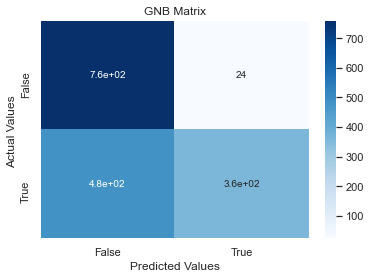

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cf1=confusion_matrix(y_test, y_pred1)
#plot_confusion_matrix(gnbmodel, X_test, y_test)  
ax1 = sns.heatmap(cf1, annot=True, cmap='Blues')
ax1.set_title('GNB Matrix');
ax1.set_xlabel('Predicted Values')
ax1.set_ylabel('Actual Values ');
ax1.xaxis.set_ticklabels(['False','True'])
ax1.yaxis.set_ticklabels(['False','True'])
plt.show()

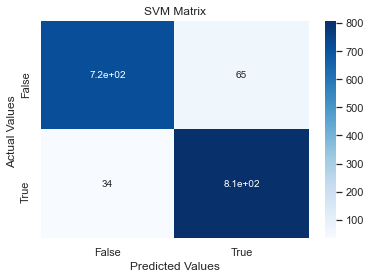

In [14]:
cf2=confusion_matrix(y_test, y_pred2)
#plot_confusion_matrix(svmmodel, X_test1, y_test)  
ax2 = sns.heatmap(cf2, annot=True, cmap='Blues')
ax2.set_title('SVM Matrix');
ax2.set_xlabel('Predicted Values')
ax2.set_ylabel('Actual Values ');
ax2.xaxis.set_ticklabels(['False','True'])
ax2.yaxis.set_ticklabels(['False','True'])
plt.show()

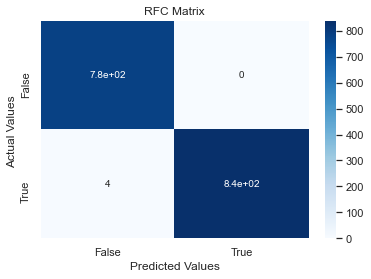

In [15]:
cf3=confusion_matrix(y_test, y_pred3)
#plot_confusion_matrix(rfcmodel, X_test, y_test)  
ax3 = sns.heatmap(cf3, annot=True, cmap='Blues')
ax3.set_title('RFC Matrix');
ax3.set_xlabel('Predicted Values')
ax3.set_ylabel('Actual Values ');
ax3.xaxis.set_ticklabels(['False','True'])
ax3.yaxis.set_ticklabels(['False','True'])
plt.show()

In [16]:
print('The Gaussian NB model is the weakest and should be scrapped. Now to find the best parameters for SVM and RandomForestClassifier.  The performance metrics for both are quite good but let us see if we can improve it more')

The Gaussian NB model is the weakest and should be scrapped. Now to find the best parameters for SVM and RandomForestClassifier.  The performance metrics for both are quite good but let us see if we can improve it more


In [17]:
skf=StratifiedKFold(n_splits=5, shuffle=True, random_state=23784559)
X_train00 = preprocessing.scale(X_train0)

In [18]:
def collate_ht_results(ht_results,metric_keys=metric_keys,display=True):
    ht_stats=dict()
    for metric in metric_keys:
        ht_stats[metric+"_mean"] = ht_results.cv_results_["mean_test_"+metric][ht_results.best_index_]
        ht_stats[metric+"_std"] = metric_std = ht_results.cv_results_["std_test_"+metric][ht_results.best_index_]
        if display:
            print("test_"+metric,ht_stats[metric+"_mean"],"("+str(ht_stats[metric+"_std"])+")")
    return ht_stats

In [19]:
parameters = {'C': [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 'gamma': ['auto','scale'],'kernel': ['linear','poly','rbf','sigmoid'],'random_state':[23784559]} 
svmmodel1 = svm.SVC()
start1 = timeit.default_timer()
svmgrid = GridSearchCV(svmmodel1, parameters,scoring=p1_metrics_scorer, n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop1 = timeit.default_timer()
start11 = timeit.default_timer()
svmgrid.fit(X_train00, y_train0)
stop11 = timeit.default_timer()
print('Best parameters: ',svmgrid.best_params_)
print('Best score: ',svmgrid.best_score_)
start12 = timeit.default_timer()
svmgridpred = svmgrid.predict(X_test1)
stop12 = timeit.default_timer()

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best parameters:  {'C': 1, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 23784559}
Best score:  1.0


In [20]:
print("Grid Search: ")
print(classification_report(y_test, svmgridpred))
print('Time to find best parameters in seconds: ',stop1-start1)  
print('Time to fit in seconds: ',stop11-start11)
print('Time to test in seconds: ',stop12-start12)
collate_ht_results(svmgrid,metric_keys=metric_keys,display=True)

Grid Search: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Time to find best parameters in seconds:  7.770000000029142e-05
Time to fit in seconds:  674.5146573
Time to test in seconds:  0.02429830000005495
test_auc 1.0 (0.0)
test_f1 1.0 (0.0)
test_accuracy 1.0 (0.0)
test_sensitivity 1.0 (0.0)
test_specificity 1.0 (0.0)
test_precision 1.0 (0.0)


{'auc_mean': 1.0,
 'auc_std': 0.0,
 'f1_mean': 1.0,
 'f1_std': 0.0,
 'accuracy_mean': 1.0,
 'accuracy_std': 0.0,
 'sensitivity_mean': 1.0,
 'sensitivity_std': 0.0,
 'specificity_mean': 1.0,
 'specificity_std': 0.0,
 'precision_mean': 1.0,
 'precision_std': 0.0}

In [21]:
svmmodel2=svm.SVC()
parametersr = {'C':  [1,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100], 'gamma': ['auto','scale'],'kernel': ['linear','poly','rbf','sigmoid'],'random_state':[23784559]} 
start2 = timeit.default_timer()
svmgridr = RandomizedSearchCV(svmmodel2, parametersr,n_iter=168,scoring=p1_metrics_scorer,n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop2 = timeit.default_timer()
start21 = timeit.default_timer()
svmgridr.fit(X_train00, y_train0)
stop21 = timeit.default_timer()
print('Best parameters: ',svmgridr.best_params_)
print('Best score: ',svmgridr.best_score_)
start22 = timeit.default_timer()
svmgridpredr = svmgridr.predict(X_test1)
stop22 = timeit.default_timer()

Fitting 5 folds for each of 168 candidates, totalling 840 fits
Best parameters:  {'random_state': 23784559, 'kernel': 'poly', 'gamma': 'auto', 'C': 1}
Best score:  1.0


In [22]:
print("")
print("Randomized Search:")
print(classification_report(y_test, svmgridpredr))
print('Time to find best parameters in seconds: ', stop2-start2) 
print('Time to fit in seconds: ',stop21-start21)
print('Time to test in seconds: ',stop22-start22)
collate_ht_results(svmgridr,metric_keys=metric_keys,display=True)


Randomized Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Time to find best parameters in seconds:  8.079999997789855e-05
Time to fit in seconds:  673.9979030999999
Time to test in seconds:  0.02282029999992119
test_auc 1.0 (0.0)
test_f1 1.0 (0.0)
test_accuracy 1.0 (0.0)
test_sensitivity 1.0 (0.0)
test_specificity 1.0 (0.0)
test_precision 1.0 (0.0)


{'auc_mean': 1.0,
 'auc_std': 0.0,
 'f1_mean': 1.0,
 'f1_std': 0.0,
 'accuracy_mean': 1.0,
 'accuracy_std': 0.0,
 'sensitivity_mean': 1.0,
 'sensitivity_std': 0.0,
 'specificity_mean': 1.0,
 'specificity_std': 0.0,
 'precision_mean': 1.0,
 'precision_std': 0.0}

In [23]:
from math import log2
from math import ceil
numberofrows=len(Mushroom_data.axes[0])
rfcmodel1 = RandomForestClassifier()
parametersr1 = {'random_state':[23784559],'n_estimators':  [10,20,30,40,50,60,70,80,90,100,1000], 'criterion': ['gini','entropy','log_loss'],'max_depth': [None,ceil(log2(numberofrows)-1)],'max_features':['sqrt','log2', None],'bootstrap':[False,True],'warm_start':[False,True],'class_weight':['balanced','balanced_subsample',None]} 
start3 = timeit.default_timer()
svmrandr1 = RandomizedSearchCV(rfcmodel1, parametersr1,n_iter=2376, scoring=p1_metrics_scorer, n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop3 = timeit.default_timer()
start31 = timeit.default_timer()
svmrandr1.fit(X_train0, y_train0)
stop31 = timeit.default_timer()
print('Best parameters: ',svmrandr1.best_params_)
print('Best score: ',svmrandr1.best_score_)
start32 = timeit.default_timer()
svmrandpredr1 = svmrandr1.predict(X_test)
stop32 = timeit.default_timer()

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
Best parameters:  {'warm_start': False, 'random_state': 23784559, 'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'gini', 'class_weight': 'balanced', 'bootstrap': False}
Best score:  1.0


In [24]:
print("")
print("Randomized Search:")
print(classification_report(y_test, svmrandpredr1))
print('Time to find best parameters in seconds: ', stop3-start3) 
print('Time to fit in seconds: ',stop31-start31)
print('Time to test in seconds: ',stop32-start32)
collate_ht_results(svmrandr1,metric_keys=metric_keys,display=True)


Randomized Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Time to find best parameters in seconds:  8.189999994101527e-05
Time to fit in seconds:  1124.0464863
Time to test in seconds:  0.0053336000000854256
test_auc 1.0 (0.0)
test_f1 1.0 (0.0)
test_accuracy 1.0 (0.0)
test_sensitivity 1.0 (0.0)
test_specificity 1.0 (0.0)
test_precision 1.0 (0.0)


{'auc_mean': 1.0,
 'auc_std': 0.0,
 'f1_mean': 1.0,
 'f1_std': 0.0,
 'accuracy_mean': 1.0,
 'accuracy_std': 0.0,
 'sensitivity_mean': 1.0,
 'sensitivity_std': 0.0,
 'specificity_mean': 1.0,
 'specificity_std': 0.0,
 'precision_mean': 1.0,
 'precision_std': 0.0}

In [25]:
from math import log2
from math import ceil
numberofrows=len(Mushroom_data.axes[0])
rfcmodel2 = RandomForestClassifier()
parametersr1 = {'random_state':[23784559],'n_estimators':  [10,20,30,40,50,60,70,80,90,100,1000], 'criterion': ['gini','entropy','log_loss'],'max_depth': [None,ceil(log2(numberofrows)-1)],'max_features':['sqrt','log2', None],'bootstrap':[False,True],'warm_start':[False,True],'class_weight':['balanced','balanced_subsample',None]} 
start4 = timeit.default_timer()
svmgridr1 = GridSearchCV(rfcmodel2, parametersr1,scoring=p1_metrics_scorer, n_jobs=-1, refit="auc", cv=skf, verbose=3,return_train_score=False)
stop4 = timeit.default_timer()
start41 = timeit.default_timer()
svmgridr1.fit(X_train0, y_train0)
stop41 = timeit.default_timer()
print('Best parameters: ',svmgridr1.best_params_)
print('Best score: ',svmgridr1.best_score_)
start42 = timeit.default_timer()
svmgridpredr1 = svmgridr1.predict(X_test)
stop42 = timeit.default_timer()

Fitting 5 folds for each of 2376 candidates, totalling 11880 fits
Best parameters:  {'bootstrap': False, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 10, 'random_state': 23784559, 'warm_start': False}
Best score:  1.0


In [26]:
print("")
print("Grid Search:")
print(classification_report(y_test, svmgridpredr1))
print('Time to find best parameters in seconds: ', stop4-start4) 
print('Time to fit in seconds: ',stop41-start41)
print('Time to test in seconds: ',stop42-start42)
collate_ht_results(svmgridr1,metric_keys=metric_keys,display=True)


Grid Search:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       783
           1       1.00      1.00      1.00       842

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Time to find best parameters in seconds:  0.00010979999979099375
Time to fit in seconds:  1122.7990867999997
Time to test in seconds:  0.00495439999986047
test_auc 1.0 (0.0)
test_f1 1.0 (0.0)
test_accuracy 1.0 (0.0)
test_sensitivity 1.0 (0.0)
test_specificity 1.0 (0.0)
test_precision 1.0 (0.0)


{'auc_mean': 1.0,
 'auc_std': 0.0,
 'f1_mean': 1.0,
 'f1_std': 0.0,
 'accuracy_mean': 1.0,
 'accuracy_std': 0.0,
 'sensitivity_mean': 1.0,
 'sensitivity_std': 0.0,
 'specificity_mean': 1.0,
 'specificity_std': 0.0,
 'precision_mean': 1.0,
 'precision_std': 0.0}

In [27]:
print('SVM and Random Forest Models have extremely high accuracy with the derived parameters.')

SVM and Random Forest Models have extremely high accuracy with the derived parameters.


In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt
!pip install --user shap
import shap

In [29]:
train2, feat = next(shuffle3.split(X=X_train, y=y_train))
X_train2 = X.loc[train2]
y_train2 = y.loc[train2]
X_feat = X.loc[feat]
y_feat = y.loc[feat]
X_train21 = preprocessing.scale(X_train2)
y_train21 = y_train2
X_feat1 = preprocessing.scale(X_feat)
y_feat1 = y_feat
plt.rcParams.update({'figure.figsize': (15.0, 15.0)})
plt.rcParams.update({'font.size': 10})
rfcmodel3 = RandomForestClassifier(random_state=23784559)
rfcmodel3.fit(X_feat, y_feat)
importantfeatures=rfcmodel3.feature_importances_

In [30]:
rfcmodel3.feature_importances_

array([0.01345285, 0.01920291, 0.01959834, 0.18503342, 0.        ,
       0.02426159, 0.12548725, 0.08175762, 0.05641601, 0.09925087,
       0.08484396, 0.22117254, 0.04208318, 0.02743947])

<BarContainer object of 14 artists>

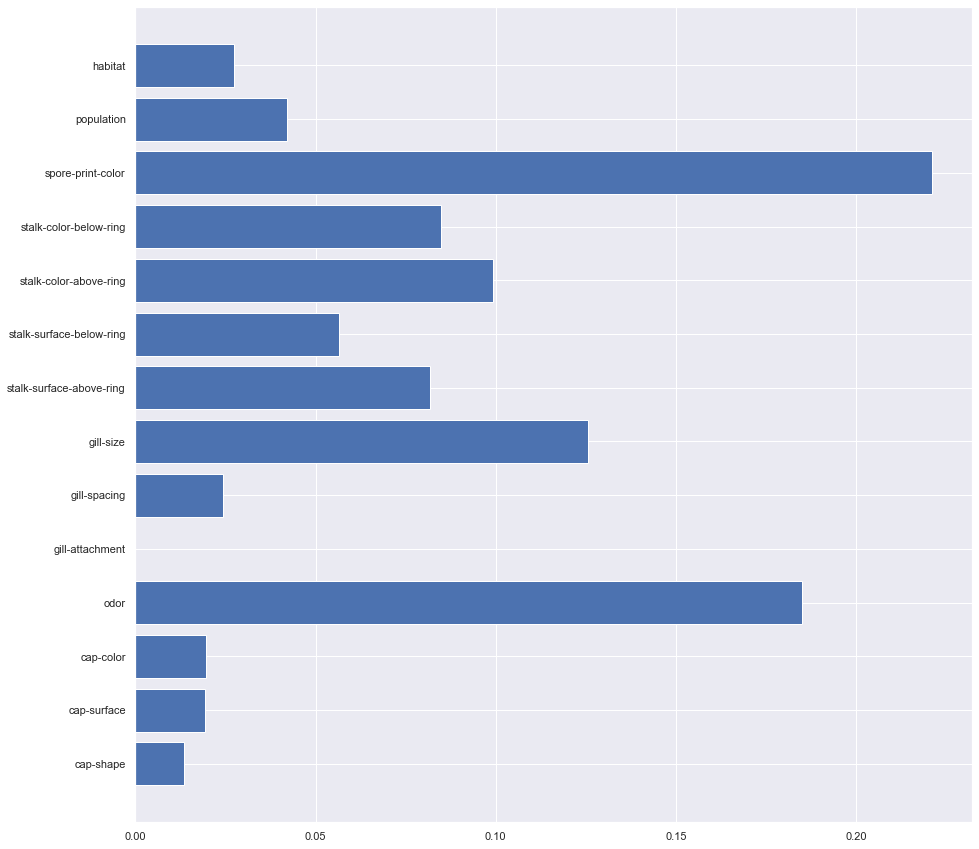

In [31]:
plt.barh(calledcol2, rfcmodel3.feature_importances_)


In [32]:
print('Gill attachment should be removed as it has no importance. Odor and spore print color are the most important features, but the importances of other features other than gill attachment are strong enough not to be removed.')

Gill attachment should be removed as it has no importance. Odor and spore print color are the most important features, but the importances of other features other than gill attachment are strong enough not to be removed.


In [33]:
calledcol3=calledcol2
calledcol3.remove('gill-attachment')
X_test = X_test[calledcol3]
X_train = X_train[calledcol3]
X_train0=X_train0[calledcol3]
X_val = X_val[calledcol3]
X_train1 = preprocessing.scale(X_train)
X_test1 = preprocessing.scale(X_test)
X_val1 = preprocessing.scale(X_val)
X_train00=preprocessing.scale(X_train0)

In [34]:
print("Here are the final SVM and Random Forest")

Here are the final SVM and Random Forest


In [35]:
svm_final = svm.SVC(random_state=23784559,kernel='poly',gamma='auto',C=5) 
svm_final.fit(X_train00, y_train0)
y_predfinalsvm = svm_final.predict(X_test1)
p1_metrics(y_test,y_predfinalsvm,include_cm=True)

{'auc': 1.0,
 'f1': 1.0,
 'accuracy': 1.0,
 'sensitivity': 1.0,
 'specificity': 1.0,
 'precision': 1.0,
 'confusion_matrix': array([[783,   0],
        [  0, 842]], dtype=int64)}

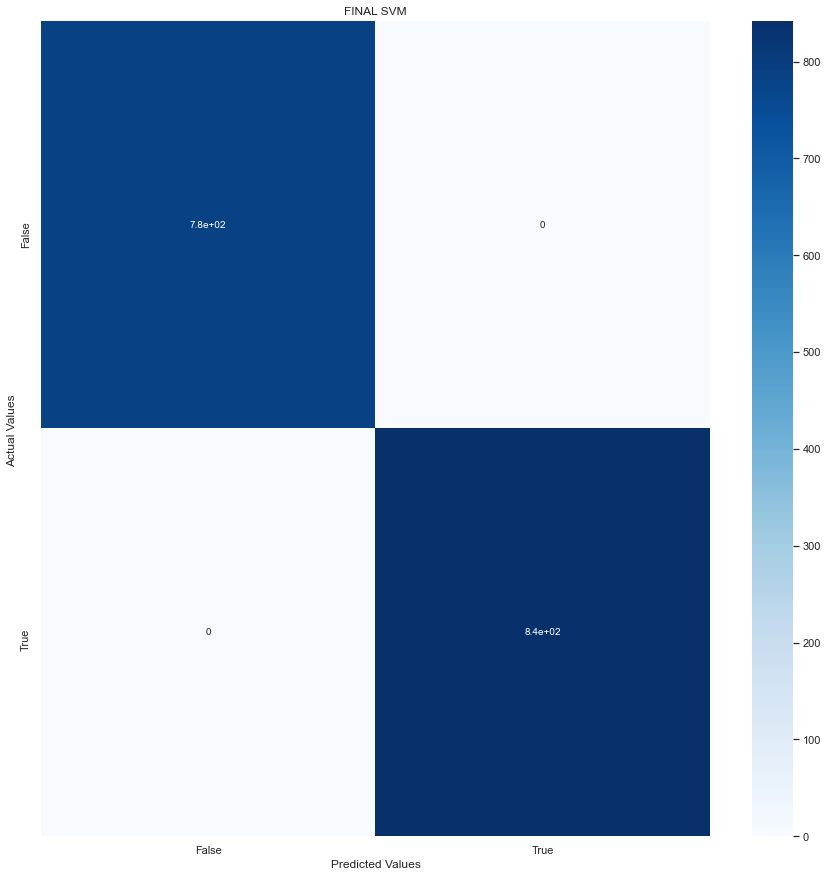

In [36]:
cfsvm=confusion_matrix(y_test, y_predfinalsvm)
#plot_confusion_matrix(svm_final, X_test1, y_test)  
axsvm = sns.heatmap(cfsvm, annot=True, cmap='Blues')
axsvm.set_title('FINAL SVM');
axsvm.set_xlabel('Predicted Values')
axsvm.set_ylabel('Actual Values ');
axsvm.xaxis.set_ticklabels(['False','True'])
axsvm.yaxis.set_ticklabels(['False','True'])
plt.show()

In [37]:
rf_final = RandomForestClassifier(bootstrap=False, class_weight='balanced',criterion='gini',max_depth=None,max_features='sqrt',n_estimators=10,random_state=23784559,warm_start=False)
rf_final.fit(X_train0, y_train0)
y_predfinalrfc = rf_final.predict(X_test)
p1_metrics(y_test,y_predfinalrfc,include_cm=True)

{'auc': 1.0,
 'f1': 1.0,
 'accuracy': 1.0,
 'sensitivity': 1.0,
 'specificity': 1.0,
 'precision': 1.0,
 'confusion_matrix': array([[783,   0],
        [  0, 842]], dtype=int64)}

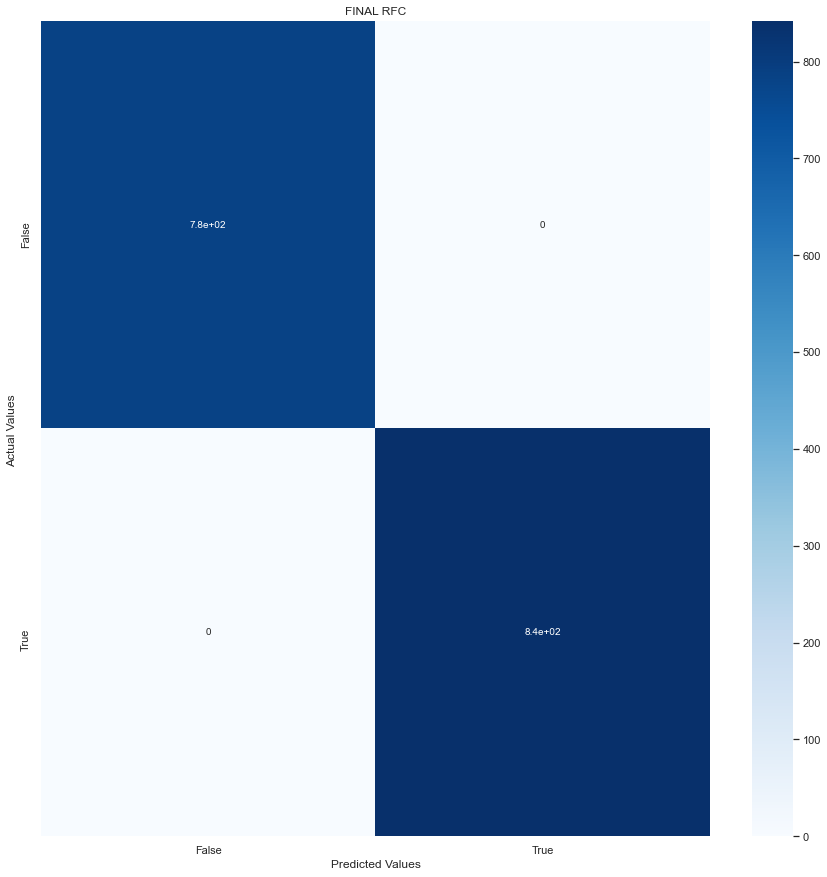

In [38]:
cfrfc=confusion_matrix(y_test, y_predfinalrfc)
#plot_confusion_matrix(rf_final, X_test, y_test)  
axrfc = sns.heatmap(cfrfc, annot=True, cmap='Blues')
axrfc.set_title('FINAL RFC');
axrfc.set_xlabel('Predicted Values')
axrfc.set_ylabel('Actual Values ');
axrfc.xaxis.set_ticklabels(['False','True'])
axrfc.yaxis.set_ticklabels(['False','True'])
plt.show()

In [39]:
from sklearn.model_selection import cross_validate
metric_keys2 = ['roc_auc','f1','accuracy','precision']
def collate_cv_results(cv_results,display=True):
    cv_stats=dict()
    for k in cv_results:
        cv_stats[k+"_mean"]=np.mean(cv_results[k])
        cv_stats[k+"_std"]=np.std(cv_results[k])
        if display:
            print(k,cv_stats[k+"_mean"],"("+str(cv_stats[k+"_std"])+")")
    return cv_stats
cv_resultssvm = cross_validate(svm_final, X_train00, y_train0, cv=skf, scoring=metric_keys2)
print("SVM Final")
storedsvm=collate_cv_results(cv_resultssvm,display=True)
cv_resultsrfc = cross_validate(rf_final, X_train0, y_train0, cv=skf, scoring=metric_keys2)
print("RFC Final")
storedrfc=collate_cv_results(cv_resultsrfc,display=True)

SVM Final
fit_time 0.07840023040771485 (0.002244438296134978)
score_time 0.030594682693481444 (0.01524453286606687)
test_roc_auc 1.0 (0.0)
test_f1 1.0 (0.0)
test_accuracy 1.0 (0.0)
test_precision 1.0 (0.0)
RFC Final
fit_time 0.026209402084350585 (0.0009806991648679464)
score_time 0.010393857955932617 (0.0007875496262920973)
test_roc_auc 1.0 (0.0)
test_f1 1.0 (0.0)
test_accuracy 1.0 (0.0)
test_precision 1.0 (0.0)


In [40]:
def collate_cv_results2(cv_results,dict1,dict2,display=True):
    for k in cv_results:
        dict1[k]=np.mean(cv_results[k])
        dict2[k]=np.std(cv_results[k])
svmdictmean={}
svmdictstd={}
rfcdictmean={}
rfcdictstd={}
collate_cv_results2(cv_resultssvm,svmdictmean,svmdictstd,display=True)
collate_cv_results2(cv_resultsrfc,rfcdictmean,rfcdictstd,display=True)

In [41]:
storedcv = pd.DataFrame(svmdictmean.items(), columns=['Metrics','svm_mean'])
storedcv['svm_std'] =  storedcv['Metrics'].map(svmdictstd)
storedcv['rfc_mean'] =  storedcv['Metrics'].map(rfcdictmean)
storedcv['rfc_std'] =  storedcv['Metrics'].map(rfcdictstd)

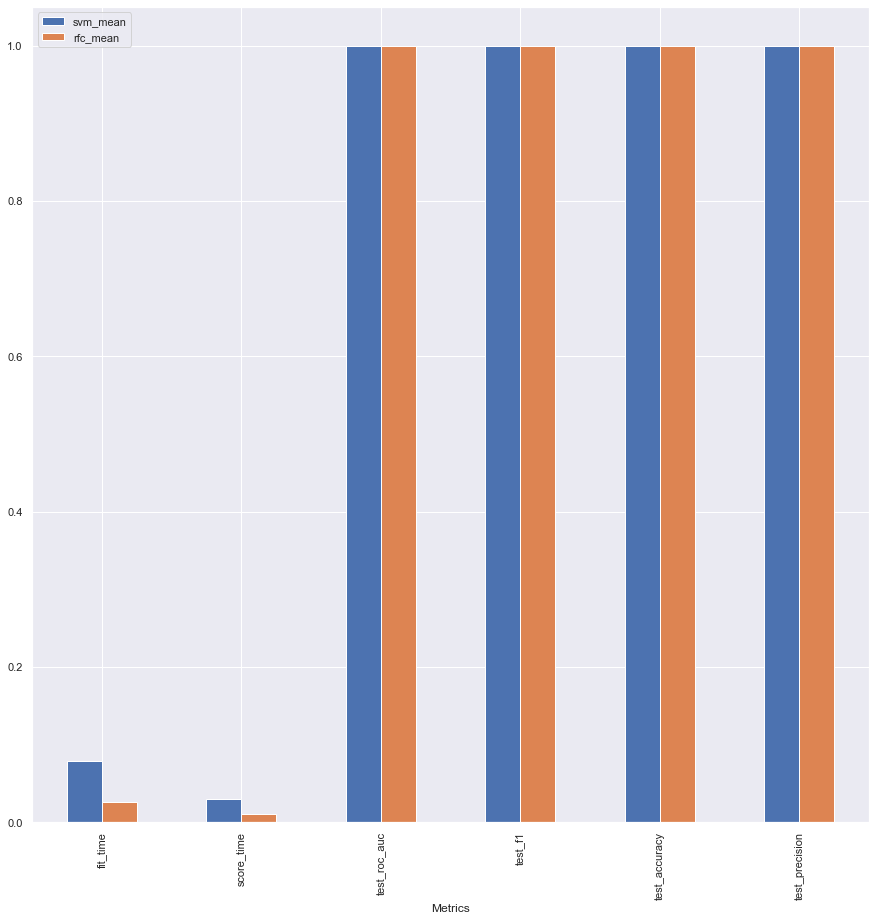

In [42]:
si = pd.DataFrame(storedcv,columns=['Metrics','svm_mean','rfc_mean'])
si.plot(x ='Metrics', y=['svm_mean','rfc_mean'], kind = 'bar')
plt.show()

In [43]:
print('All metrics outside time are 1.0 (100%) correct ')

All metrics outside time are 1.0 (100%) correct 


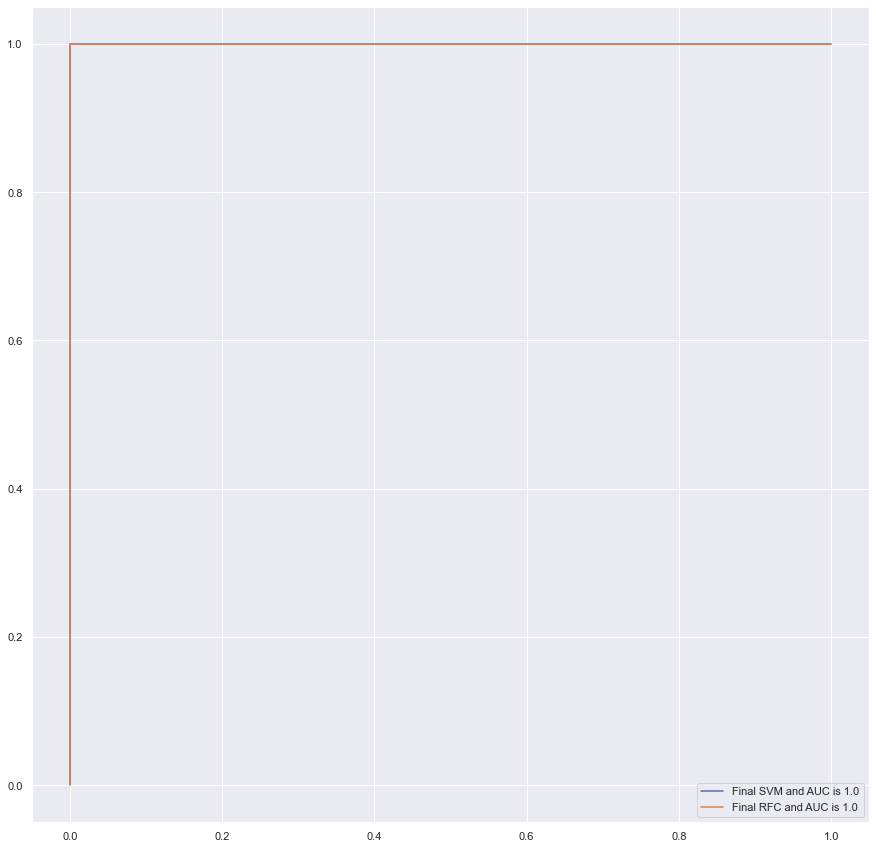

In [44]:
from sklearn import metrics
from sklearn.metrics import RocCurveDisplay
!pip install --upgrade --user scikit-learn
plt.figure(0).clf()
fp2, tp2,_= metrics.roc_curve(y_test, y_predfinalsvm)
auc2=metrics.roc_auc_score(y_test, y_predfinalsvm)
plt.plot(fp2,tp2,label="Final SVM and AUC is "+str(auc2))
fp3, tp3,_= metrics.roc_curve(y_test,y_predfinalrfc)
auc3=metrics.roc_auc_score(y_test,y_predfinalrfc)
plt.plot(fp3,tp3,label="Final RFC and AUC is "+str(auc3))
plt.legend()